In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

## Steam Genre Cluster Analysis

We cluster players using vector representations of the number of hours they have played in each steam genre in the dataset.

In [4]:
# Read in the playtimes attributes to each genre for each player
df_genre_playtimes = pd.read_csv('./data/buldars_gate_3_player_genre_playtimes_2023-07-04.csv', index_col='steam_id')
df_genre_playtimes.head(10)

,action,rpg,adventure,casual,simulation,strategy,indie,free to play,massively multiplayer,racing,...,photo editing,utilities,video production,game development,audio production,education,web publishing,software training,movie,accounting
steam_id,,,,,,,,,,,,,,,,,,,,,
76561199004154858,284719,139819,111869,4658,145470,188425,73581,61985,13944,433,...,358,358,0,0,0,0,0,0,0,0
76561199058333673,21094,6021,23339,1251,782,6846,4261,3010,2621,53,...,329,329,0,0,0,0,0,0,0,0
76561198016380377,114234,138309,153019,87191,108409,124549,131727,76426,47784,10,...,732,4214,0,0,0,0,0,0,0,0
76561198898124688,169319,116134,92346,11562,8312,20518,29027,1667,18750,59,...,875,875,14,0,0,0,0,0,0,0
76561198011137973,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
76561198077343629,634818,432432,326148,447088,419344,208922,693998,241579,289409,43504,...,100,100,1,0,0,0,0,0,0,0
76561198812092506,17930,30214,17235,3651,28908,13614,44324,231,2,0,...,0,0,1,0,0,0,0,0,0,0
76561199154959752,70162,65357,65806,18,498,5059,62067,2009,58024,0,...,0,0,0,0,0,0,0,0,0,0
76561198327096505,362436,80393,114347,11564,26588,10833,21271,188176,20175,289,...,5190,5236,2472,0,0,0,0,0,0,0


In [7]:
df_genre_playtimes.describe(percentiles=[.05, .25, .5, .75, .95]).transpose()

,count,mean,std,min,5%,25%,50%,75%,95%,max
action,2602.0,188628.632590,198116.007502,0.0,0.0,38636.25,134297.0,275927.25,563219.60,1980444.0
rpg,2602.0,111020.311683,136320.668515,0.0,0.0,26929.50,72091.5,145884.75,351893.05,1847435.0
adventure,2602.0,98888.161030,109709.069791,0.0,0.0,28038.75,71297.0,132114.25,293706.70,1599631.0
casual,2602.0,28329.480784,68944.968536,0.0,0.0,2335.75,11190.0,28882.75,104442.65,1978306.0
simulation,2602.0,58452.990008,103768.046732,0.0,0.0,4974.50,22442.0,67470.50,230333.15,1488543.0
strategy,2602.0,83620.679477,136098.409454,0.0,0.0,11894.75,35295.0,94384.50,327075.75,2178063.0
indie,2602.0,84856.872790,121356.139513,0.0,0.0,13891.50,48573.5,113254.25,280536.00,2181871.0
free to play,2602.0,76577.737894,125241.516652,0.0,0.0,4850.50,31091.0,98809.75,300777.00,2233679.0
massively multiplayer,2602.0,41845.485396,89070.754257,0.0,0.0,1063.00,11808.0,44662.25,183866.90,1392488.0
racing,2602.0,5105.240968,17685.474718,0.0,0.0,0.00,203.0,2210.75,25909.10,301755.0


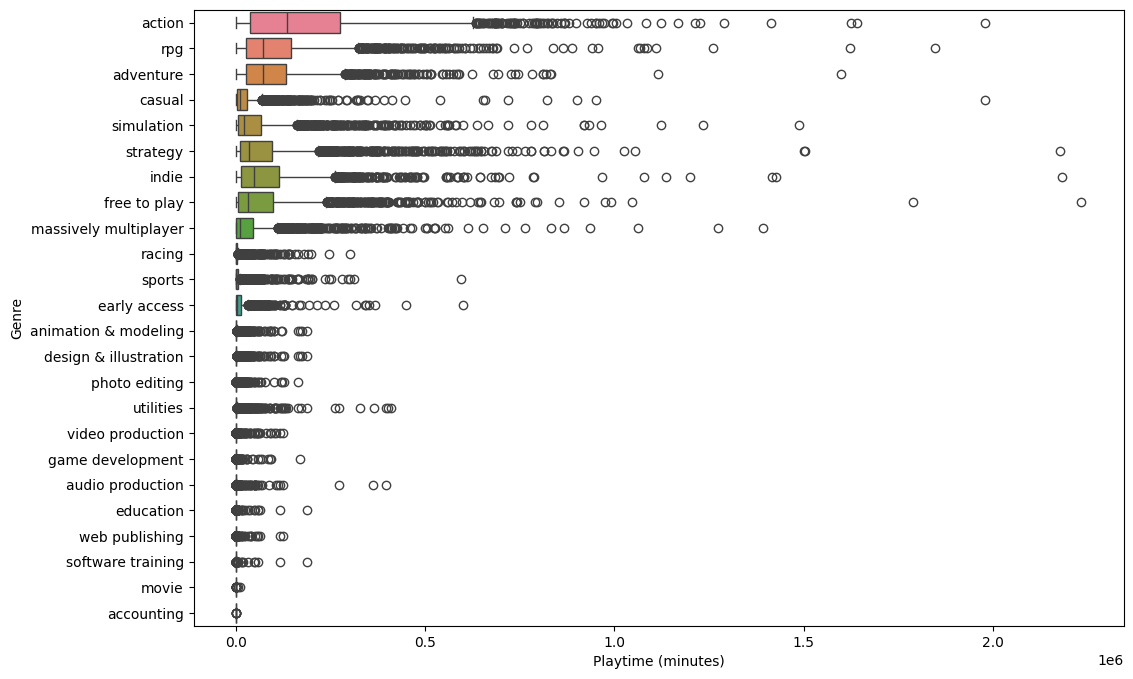

In [60]:
f, ax = plt.subplots(figsize=(12, 8))
sns.boxplot(df_genre_playtimes, orient='h');
ax.set(xlabel="Playtime (minutes)", ylabel="Genre")
plt.show()

In [39]:
# Try clipping all columns at the 95% percentile

quantile_value = 0.95

percentiles = df_genre_playtimes.quantile(quantile_value)

df_genre_playtimes_clipped = df_genre_playtimes.clip(upper=percentiles, axis=1)

We use PCA to project the data into a lower-dimensional space and plot clusters in this space.

In [83]:
n_genres = len(df_genre_playtimes.columns)

# Scale data to be centered on mean and have unit standard deviation
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_genre_playtimes_clipped)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df_genre_playtimes_clipped)

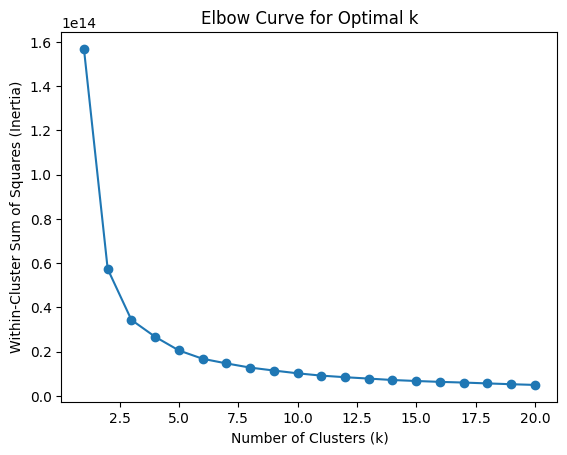

In [85]:
# Determine the optimal number of clusters using the Elbow Method
inertia = []

for i in range(1, 21):  # try different values of k from 1 to 20
    kmeans = KMeans(init="k-means++", n_init=4, n_clusters=i)
    kmeans.fit(reduced_data)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.plot(range(1, 21), inertia, marker='o')
plt.title('Elbow Curve for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (Inertia)')
plt.show()

In [86]:
# Set number of clusters based on elbow in curve
n_clusters = 5

kmeans = KMeans(init="k-means++", n_init=4, n_clusters=n_clusters)
kmeans.fit(reduced_data)

KMeans(n_clusters=5, n_init=4)

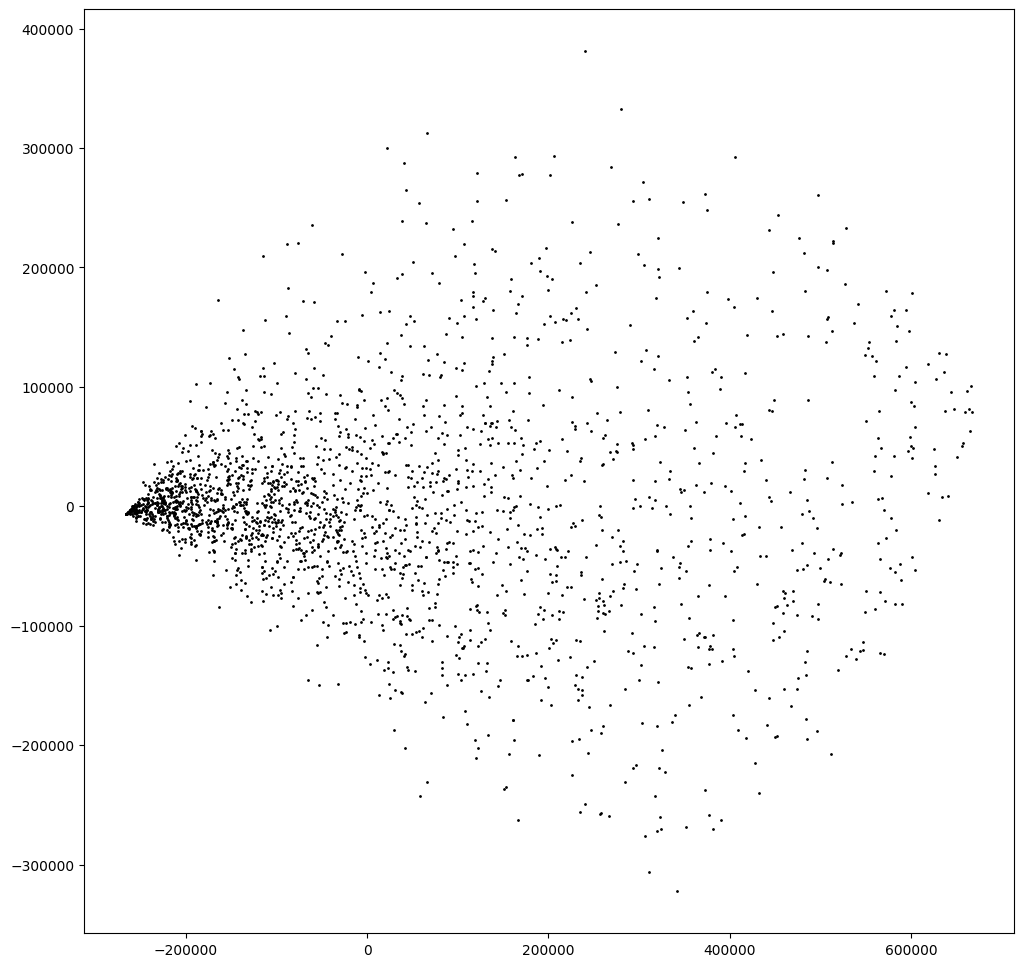

In [122]:
plt.figure(figsize=(12, 12))
plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2);
plt.show()

In [109]:
# Get cluster assignments for each data point
cluster_assignments = kmeans.predict(reduced_data)

# Add cluster assignment information to the scaled data
df_clustered = pd.DataFrame(
    scaled_data, 
    columns=df_genre_playtimes_clipped.columns, 
    index=df_genre_playtimes_clipped.index
)
df_clustered['cluster'] = cluster_assignments

# Identify the rows closest to each cluster centroid
closest_rows = pd.DataFrame(columns=df_genre_playtimes.columns)

for cluster_label in range(n_clusters):
    cluster_center = kmeans.cluster_centers_[cluster_label]
    # Find the index of the row with the minimum Euclidean distance to the cluster center
    closest_row_index = np.argmin(np.linalg.norm(reduced_data - cluster_center, axis=1))
    closest_row = df_clustered.iloc[closest_row_index]
    closest_rows = closest_rows.append(closest_row)

closest_rows.set_index('cluster', inplace=True)

/tmp/ipykernel_206792/1393856696.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  closest_rows = closest_rows.append(closest_row)
/tmp/ipykernel_206792/1393856696.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  closest_rows = closest_rows.append(closest_row)
/tmp/ipykernel_206792/1393856696.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  closest_rows = closest_rows.append(closest_row)
/tmp/ipykernel_206792/1393856696.py:20: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  closest_rows = closest_rows.append(closest_row)
/tmp/ipykernel_206792/1393856696.py:20: FutureWarning: The frame.append method is deprecated and will be rem

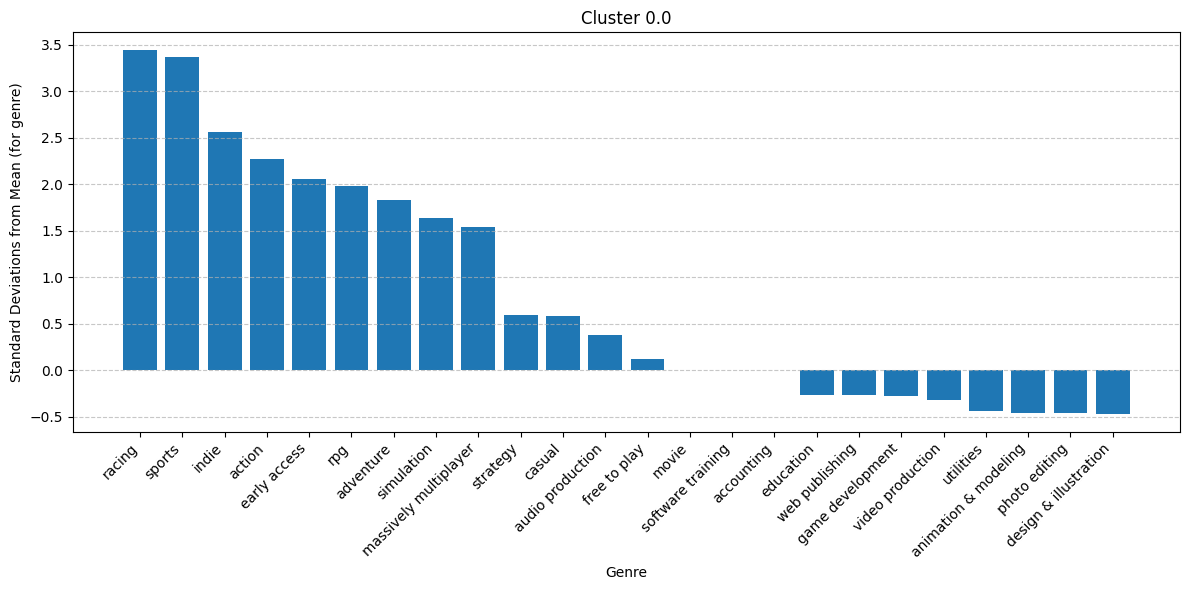

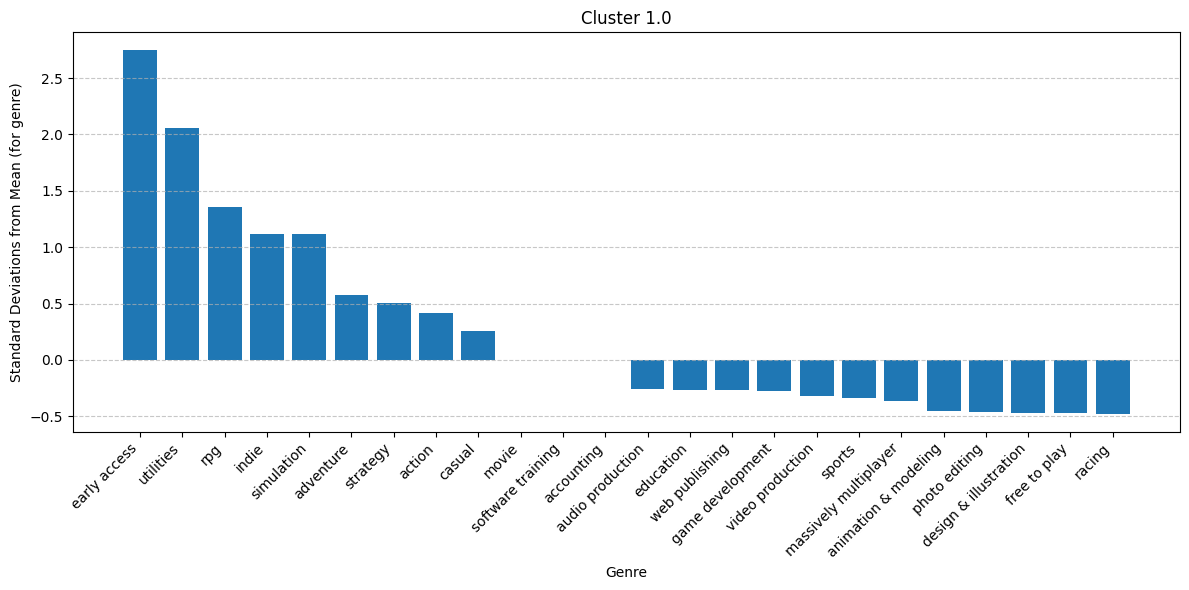

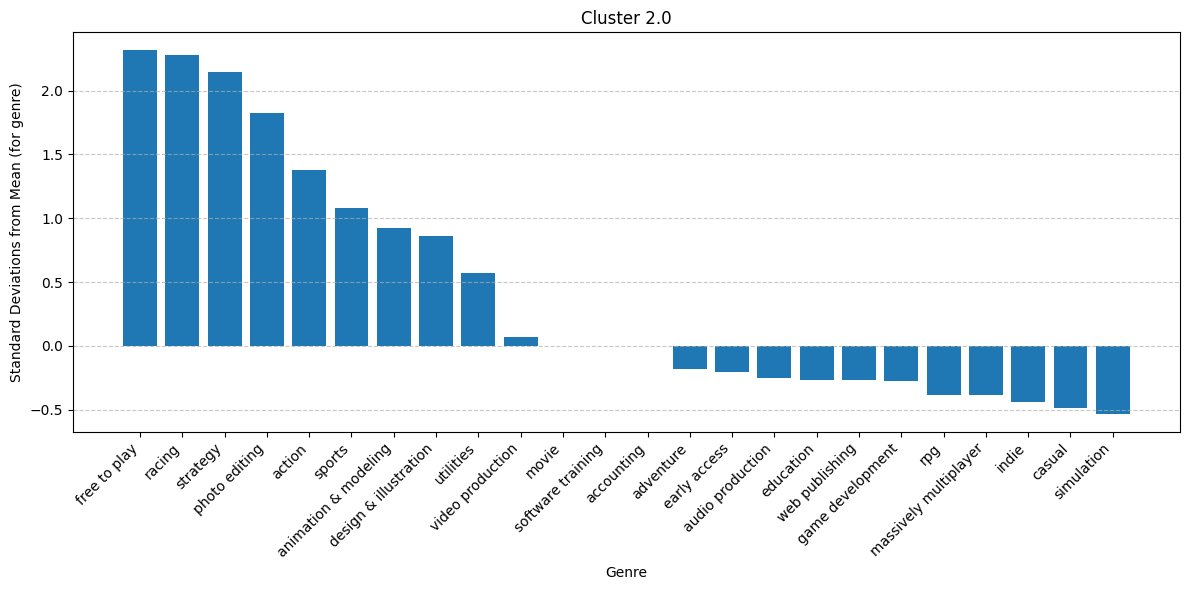

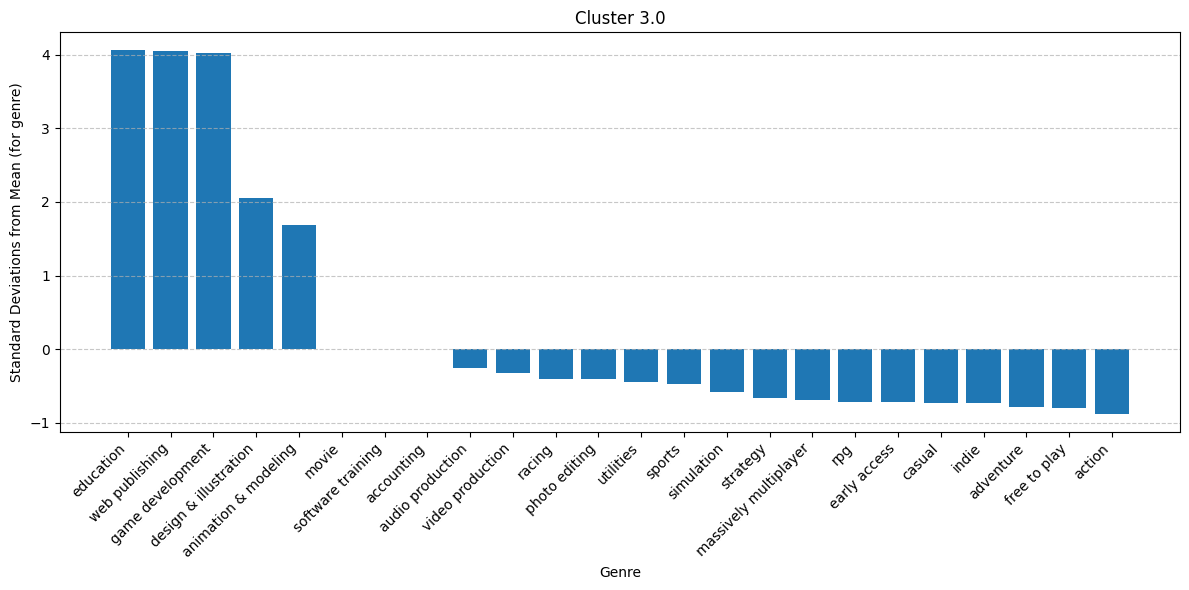

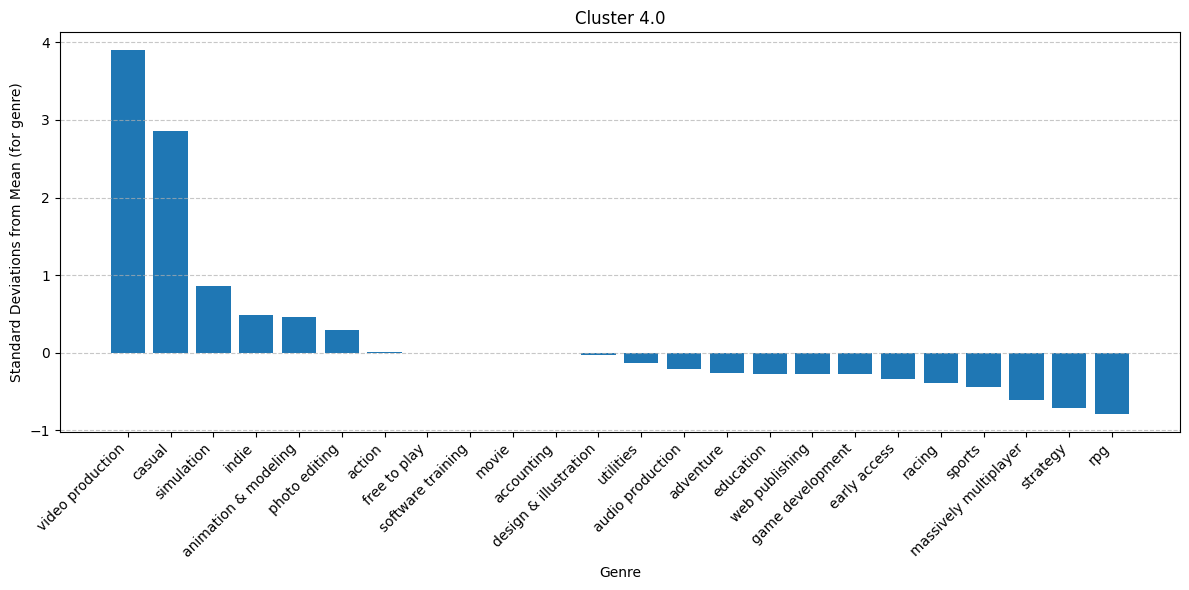

In [124]:
# Iterate over clusters and create a separate figure for each
for cluster_label in closest_rows.index:
    # Sort the values for the current cluster
    sorted_values = closest_rows.loc[cluster_label].sort_values(ascending=False)

    # Create a bar chart for the current cluster
    plt.figure(figsize=(12, 6))
    plt.bar(sorted_values.index, sorted_values)
    plt.title(f'Cluster {cluster_label}')
    plt.xlabel('Genre')
    plt.ylabel('Standard Deviations from Mean (for genre)')
    plt.xticks(rotation=45, ha='right') 
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    plt.show()

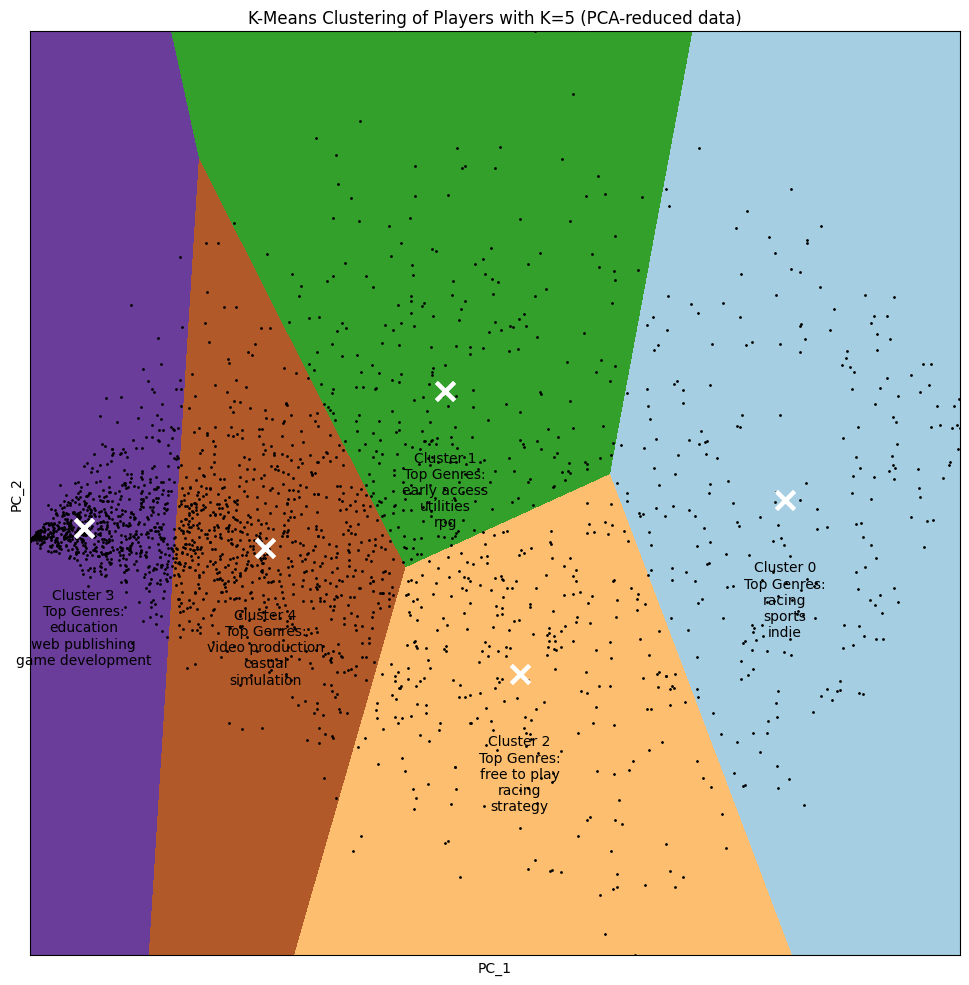

In [147]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 100  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(12, 12))
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)

# Annotate the player closest to each centroid
for i, (cx, cy) in enumerate(centroids):
    sorted_values = closest_rows.loc[i].sort_values(ascending=False)
    top_genres_str = '\n'.join([genre for genre in sorted_values.index[0:3]])
    plt.scatter(cx, cy, marker="x", s=169, linewidths=3, color="w", zorder=10)
    plt.annotate(f'Cluster {i}\nTop Genres:\n{top_genres_str}', (cx, cy), fontsize=10, color='black',
                 ha='center', va='bottom', textcoords='offset points', xytext=(0, -100))

plt.title(
    f"K-Means Clustering of Players with K={n_clusters} (PCA-reduced data)"
)
plt.xlabel('PC_1')
plt.ylabel('PC_2')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()